# Google Landmark Recognition 

## 1. data source 

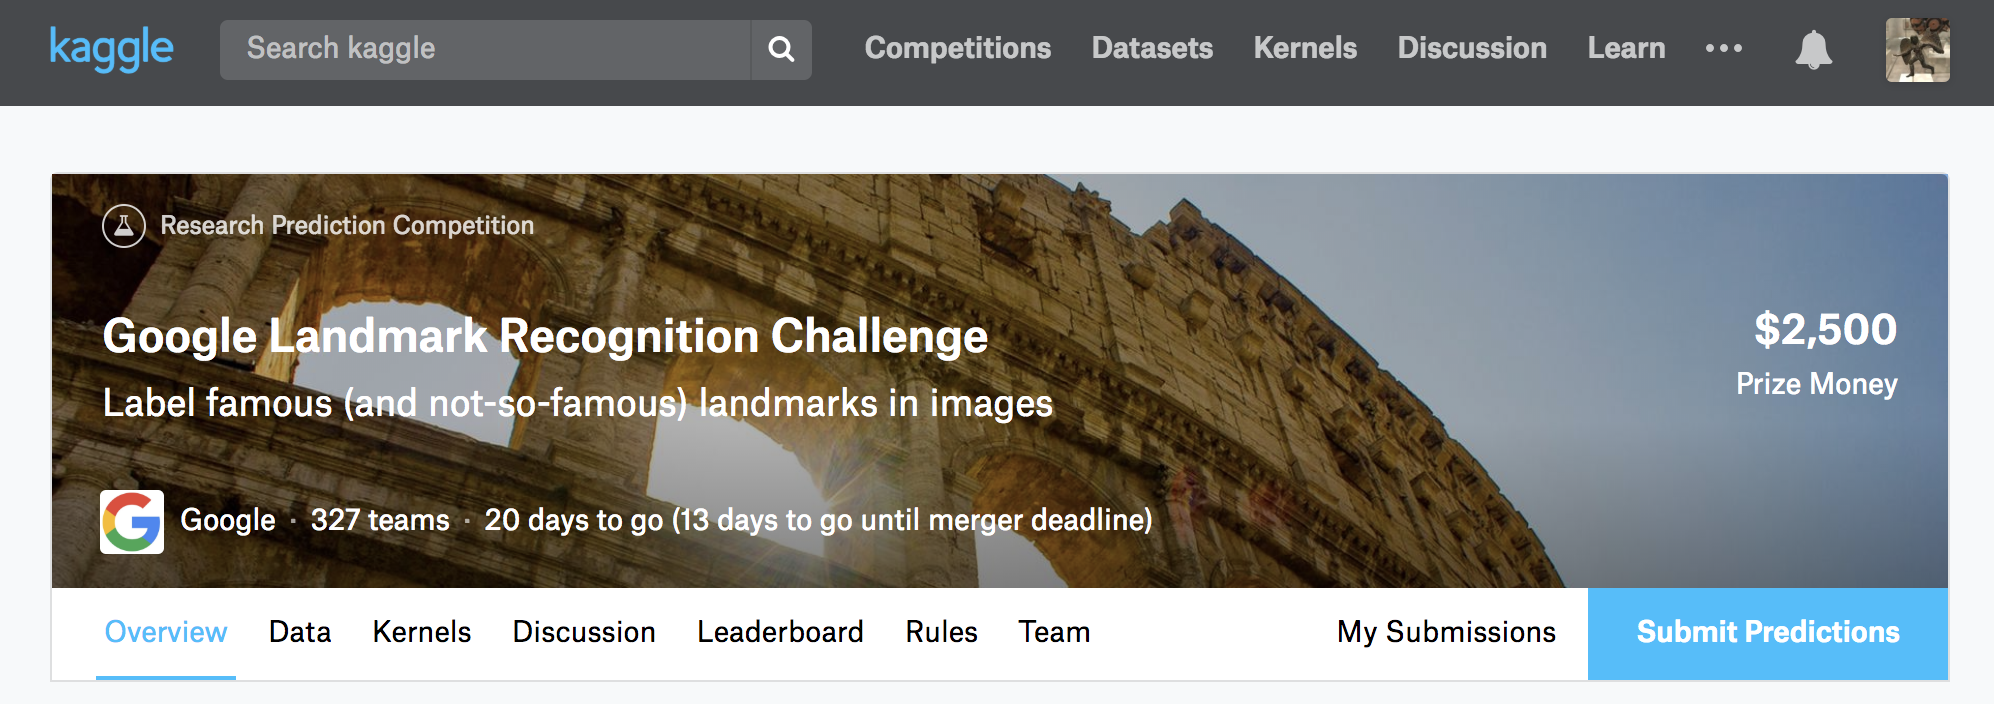

## 2. data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
df.head()

,id,url,landmark_id
0,cacf8152e2d2ae60,http://static.panoramio.com/photos/original/70...,4676
1,0a58358a2afd3e4e,http://lh6.ggpht.com/-igpT6wu0mIA/ROV8HnUuABI/...,6651
2,6b2bb500b6a38aa0,http://lh6.ggpht.com/-vKr5G5MEusk/SR6r6SJi6mI/...,11284
3,b399f09dee9c3c67,https://lh3.googleusercontent.com/-LOW2cjAqubA...,8429
4,19ace29d77a5be66,https://lh5.googleusercontent.com/-tnmSXwQcWL8...,6231


In [3]:
df.shape

(1225029, 3)

In [4]:
df.landmark_id.astype('object').describe()

count     1225029
unique      14951
top          9633
freq        50337
Name: landmark_id, dtype: int64

## 3. select subset 

In [13]:
# df.landmark_id.value_counts()[200:220].plot(kind='bar')
# plt.show()

In [3]:
clist = list(df.landmark_id.value_counts()[200:220].index)
print(len(clist))

20


In [4]:
label_map_ = {
    'Kurhaus of Scheveningen':0,
    'Rosary Basilica':1,
    'Innsbruck':2,
    'Chepstow Castle':3,
    'Tiger Leaping Gorge':4,
    "Clifford's Tower, York":5,
    "saint peter's basilica, statue of saint gregory the illuminator":6,
    "statue of decebalus":7,
    "Galleria Borghese":8,
    "rotunda of mosta":9,
    "baochu pagoda":10,
    "latvian academy of sciences":11,
    "delaware memorial bridge":12,
    "St. Francis Xavier Chapel":13,
    "vall de núria":14,
    "Eltz Castle":15,
    "chinatown":16,
    "lácar lake":17,
    "london coliseum":18,
    "lubart's castle":19
}

In [5]:
df2 = df[df['landmark_id'].isin(clist)]
df2 = df2.reset_index().drop(['index'],axis =1)
df2.shape

(15043, 3)

# load image from url 

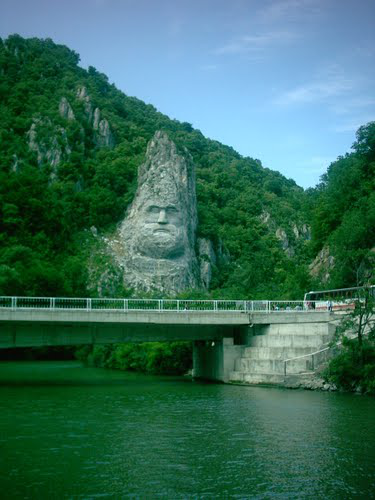

In [10]:
from PIL import Image
import requests
from io import BytesIO

url = df2.url[0]
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

# download 

In [ ]:
import requests as req
from PIL import Image
from io import BytesIO
import os

TARGET_SIZE = 299
IMAGE_QUA = 90

def image_download(DF):
    
    error_download = 0
    error_idx = []
    
    #make dir for train and test 
    for i in DF.landmark_id.unique():
        os.makedirs("/Volumes/lulu/landmark/90quality/train/{}".format(str(i)), exist_ok=True)
        os.makedirs("/Volumes/lulu/landmark/90quality/test/{}".format(str(i)), exist_ok=True)

    #download
    for i in range(len(DF)):
        try:
            if i < len(DF)-3000:
                filename = "/Volumes/lulu/landmark/90quality/train/{}/{}.png".format(str(DF.landmark_id[i]),str(DF.id[i]))

            else:
                filename = "/Volumes/lulu/landmark/90quality/test/{}/{}.png".format(str(DF.landmark_id[i]),str(DF.id[i]))
                 
            print(filename)                
            print('Detect the image id and generate filename:' + str(DF.id[i]))
            path = DF.url[i]
            print('Detect the image and download from' + path)
            response = req.get(path)
            pil_image = Image.open(BytesIO(response.content))
            pil_image_rgb = pil_image.convert('RGB')
            pil_image_resize = pil_image_rgb.resize((TARGET_SIZE, TARGET_SIZE))
            pil_image_resize.save(filename,quality = IMAGE_QUA)

        except:
            print('Fail to download the image.')
            error_idx.append(i)
            error_download += 1
            pass
                
    print(error_download, error_idx)

image_download(df2)
                 

/Volumes/lulu/landmark/90quality/train/1393/8b896b9184534c0d.png
Detect the image id and generate filename:8b896b9184534c0d
Detect the image and download fromhttp://mw2.google.com/mw-panoramio/photos/medium/26557845.jpg
/Volumes/lulu/landmark/90quality/train/9737/e6cdb789eb2081c6.png
Detect the image id and generate filename:e6cdb789eb2081c6
Detect the image and download fromhttps://lh6.googleusercontent.com/-nhIuqLQyb1U/SR2EmVwbM_I/AAAAAAAAAsw/ahrwC8TZVlk/s1600/
/Volumes/lulu/landmark/90quality/train/1926/282f867a2395d8a7.png
Detect the image id and generate filename:282f867a2395d8a7
Detect the image and download fromhttp://lh4.ggpht.com/-wYbLCQq7BRY/R-kWplwkamI/AAAAAAAAB3A/GjX0BzMDl4o/rj/
/Volumes/lulu/landmark/90quality/train/10432/48fc9d6a90afc335.png
Detect the image id and generate filename:48fc9d6a90afc335
Detect the image and download fromhttp://lh3.ggpht.com/-2RSIrSQIZug/TAefS4jAenI/AAAAAAAAASU/_8ZO1myooc8/s1600/
/Volumes/lulu/landmark/90quality/train/2080/867c97ce1ca7cc0b.png